#SCRIPT EXPLORAÇÃO COM GRÁFICOS E MAPAS

Lista de itens obrigatórios para essa exploração

1. Agora você deve fazer um gráfico utilizando informações provenientes de uma consulta. Percebemos quais são os quatro estados que possuem maior frequência de relatos, assim como os tipos de OVNIs mais populares. Portanto, você deve fazer dois gráficos que envolvam essas informações.
  - Gráfico de barras agrupadas
  - Gráfico de barras empilhadas
   
2. Enriqueceremos os dados ainda mais, dessa vez na forma de mapas. Para construirmos mapas precisamos de latitude e longitude (usar a biblioteca zipcodes). Para criar os mapas você pode utilizar o gmaps, matplotlib > basemap ou folium.
> Criar um mapa do país inteiro (EUA) e plotar no mapa as ocorrências para todas as cidades. De forma a construir uma representação visual da quantidade de ocorrências por cidade e estado. Isso permitirá uma ideia geral dos dados.

  - Exemplos: https://photos.app.goo.gl/aWiUuzurfpLkaxik9

4. A próxima etapa é criar um mapa apenas do estado da Califórnia, para analisar se essas visualizações se distribuem de forma homogênea dentro do estado.
  - Exemplos: https://photos.app.goo.gl/eHSQoc9mhk9cSgd58

5. Onde na Califórnia está localizada a maior quantidade de visualizações de objetos voadores não identificados? E qual será a razão?

### Etapa inicial

In [40]:
# Os imports e instalações, que vamos usar para realizarmos as análises 
# também pode-se usar outras bibliotecas se desejar.
!pip install pandasql
!pip install geopandas
!pip install zipcodes
!pip install folium
!pip install pandas 

import pandas as pd
import numpy as np
import pandasql
from pandasql import sqldf
import matplotlib.pyplot as plt
import geopandas as gpds
import zipcodes as zpc
import sys
import folium
from folium import plugins

In [41]:
# Abra o arquivo CSV e mostre algumas linhas
df_ovnis = pd.read_csv('ovnis_clean.csv')
df_ovnis.head()

,Unnamed: 0,DATE/TIME,CITY,STATE,SHAPE,DURATION,SUMMARY,POSTED
0,0,8/31/97 05:15,Lost Lake,OR,Egg,3 min,Two blue egg shaped objects floated past our c...,1/10/09
1,1,8/30/97 21:00,Ocracoke,NC,Other,5 minutes,Several stationary white lights in a curved sh...,7/14/13
2,2,8/30/97 19:00,Fort Fairfield,ME,Changing,10 minutes,Huge bright white round orange and red pulsati...,3/18/16
3,3,8/29/97 22:00,Tucson,AZ,Chevron,20+ secs.,As we traveled the 10e freeway to Tucson the c...,10/30/06
4,4,8/25/97 22:00,Fontana,CA,Triangle,15 sec.,My brother and I saw 3 lights forming a shape ...,10/30/06


## Análise 

Iremos agora com a utilização de informações visuais realizar os items elaborados anteriormente.

### P1: Agora você deve fazer um gráfico utilizando informações provenientes de uma consulta. Percebemos quais são os quatro estados que possuem maior frequência de relatos, assim como os tipos de OVNIs mais populares. Portanto, você deve fazer dois gráficos que envolvam essas informações.


#### Gráfico de barras agrupadas

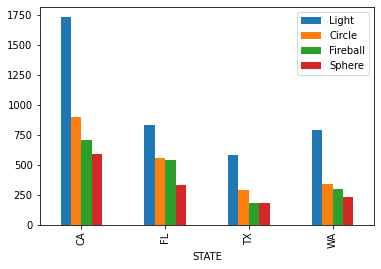

In [42]:
# pysqldf permite consultar DataFrames do pandas usando a sintaxe SQL. Funciona de forma semelhante ao sqldf em R. 
# O pysqldf busca fornecer uma maneira mais familiar de manipular e limpar dados para pessoas novas em Python ou 
# no pandas.
pysqldf = lambda q: sqldf(q, globals())
    #   """
    #   Função para calcular quais são os quatro estados que possuem maior frequência de relatos, e quais
    #   são os tipos de OVNIS mais populares.
    #   INPUT:
    #   q: É a o código da Query (uma query é um pedido de uma informação ou de um dado. Esse pedido também pode 
    #   ser entendido como uma consulta, uma solicitação ou, ainda, uma requisição.)
    #   globals(): O conjunto de variáveis globais do ambiente, definidas pelo usuário.
    #   OUTPUT:
    #   DataFrame com o resultado da query traz quais são os quatro estados que possuem maior frequência de 
    #   relatos, assim como os tipos de OVNIS mais populares.
    #   """


# cria um novo DataFrame a partir do código da query.
df_ovnis_4states=pysqldf(""" SELECT STATE,COUNT(CASE WHEN SHAPE == 'Light' THEN 1 END) Light,COUNT(CASE WHEN SHAPE == 'Circle' THEN 1 END) Circle,COUNT(CASE WHEN SHAPE == 'Fireball' THEN 1 END) Fireball,COUNT(CASE WHEN SHAPE == 'Sphere' THEN 1 END) Sphere
FROM df_ovnis WHERE 
STATE == 'CA' or STATE == 'WA' or STATE == 'FL' OR STATE == 'TX' 
GROUP BY STATE
""" )

# salva o novo conjuntos de dados para o arquivo .csv 
df_ovnis_4states.to_csv('quatro_estados_com_mfr_e_ovnis_mp.csv') 

# plot do gráfico de barras agrupadas
df_ovnis_4states.plot.bar(x = 'STATE', y = ['Light', 'Circle','Fireball','Sphere'])

#### Gráfico de barras empilhadas


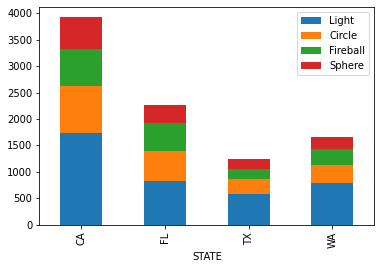

In [43]:
# plot do gráfico de barras empilhadas (a única coisa que muda nesse código é que passamos o argumento stacked como verdadeiro, 
# o que faz com que as barras fiquem empilhadas)
df_ovnis_4states.plot.bar(x = 'STATE', y = ['Light', 'Circle','Fireball','Sphere'],stacked=True)

#### Outra forma de resolução para barras agrupadas:


337


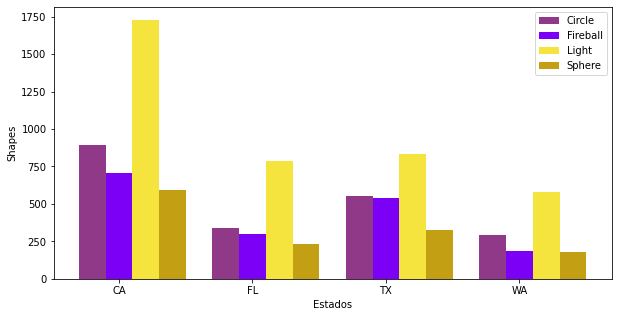

In [44]:
# usa_states = pd.read_csv("df_OVNI_preparado.csv")
relatos = pd.read_csv("ovnis_clean.csv")


caCircle = relatos.loc[(relatos['STATE'] == 'CA') & (relatos['SHAPE'] == 'Circle')]
waCircle = relatos.loc[(relatos['STATE'] == 'WA') & (relatos['SHAPE'] == 'Circle')]
flCircle = relatos.loc[(relatos['STATE'] == 'FL') & (relatos['SHAPE'] == 'Circle')]
txCircle = relatos.loc[(relatos['STATE'] == 'TX') & (relatos['SHAPE'] == 'Circle')]

caFireball = relatos.loc[(relatos['STATE'] == 'CA') & (relatos['SHAPE'] == 'Fireball')]
waFireball = relatos.loc[(relatos['STATE'] == 'WA') & (relatos['SHAPE'] == 'Fireball')]
flFireball = relatos.loc[(relatos['STATE'] == 'FL') & (relatos['SHAPE'] == 'Fireball')]
txFireball = relatos.loc[(relatos['STATE'] == 'TX') & (relatos['SHAPE'] == 'Fireball')]

caLight = relatos.loc[(relatos['STATE'] == 'CA') & (relatos['SHAPE'] == 'Light')]
waLight = relatos.loc[(relatos['STATE'] == 'WA') & (relatos['SHAPE'] == 'Light')]
flLight = relatos.loc[(relatos['STATE'] == 'FL') & (relatos['SHAPE'] == 'Light')]
txLight = relatos.loc[(relatos['STATE'] == 'TX') & (relatos['SHAPE'] == 'Light')]

caSphere = relatos.loc[(relatos['STATE'] == 'CA') & (relatos['SHAPE'] == 'Sphere')]
waSphere = relatos.loc[(relatos['STATE'] == 'WA') & (relatos['SHAPE'] == 'Sphere')]
flSphere = relatos.loc[(relatos['STATE'] == 'FL') & (relatos['SHAPE'] == 'Sphere')]
txSphere = relatos.loc[(relatos['STATE'] == 'TX') & (relatos['SHAPE'] == 'Sphere')]


print(len(waCircle))

Circle = [len(caCircle), len(waCircle), len(flCircle), len(txCircle)]
Fireball = [len(caFireball), len(waFireball), len(flFireball), len(txFireball)]
Light = [len(caLight), len(waLight), len(flLight), len(txLight)]
Sphere = [len(caSphere), len(waSphere), len(flSphere), len(txSphere)]

barWidth = 0.2
plt.figure(figsize=(10,5))

r1 = np.arange(len(Circle))
r2 = [ x + barWidth for x in r1]
r3 = [ x + barWidth for x in r2]
r4 = [ x + barWidth for x in r3]

plt.bar(r1, Circle, color='#8F3988', width=barWidth, label='Circle')
plt.bar(r2, Fireball, color='#7C00F5', width=barWidth, label='Fireball')
plt.bar(r3, Light, color='#F6E43E', width=barWidth, label='Light')
plt.bar(r4, Sphere, color='#C29F13', width=barWidth, label='Sphere')

plt.xlabel('Estados')
plt.xticks([r + barWidth for r in range(len(Circle))], ['CA', 'FL', 'TX', 'WA'])
plt.ylabel('Shapes')

plt.legend()
plt.show()

### P2: Enriqueceremos os dados ainda mais, dessa vez na forma de mapas. Para construirmos mapas precisamos de latitude e longitude (usar a biblioteca zipcodes). Para criar os mapas você pode utilizar o gmaps, matplotlib > basemap ou folium.

> Criar um mapa do país inteiro (EUA) e plotar no mapa as ocorrências para todas as cidades. De forma a construir uma representação visual da quantidade de ocorrências por cidade e estado. Isso permitirá uma ideia geral dos dados.

In [45]:
#Pegando os dados da biblioteca zipcodes (somente os dados que nos serão úteis), atribuindo ao dataframe "df_zipcodes"
zipcodes_json = zpc.list_all()
df_zipcodes = pd.DataFrame(zipcodes_json)

In [46]:
df_zipcodes = df_zipcodes[['zip_code','city','state','lat','long']]
df_zipcodes

,zip_code,city,state,lat,long
0,00501,Holtsville,NY,40.8179,-73.0453
1,00544,Holtsville,NY,40.7888,-73.0394
2,00601,Adjuntas,PR,18.1967,-66.7367
3,00602,Aguada,PR,18.3529,-67.1775
4,00603,Aguadilla,PR,18.4586,-67.1299
...,...,...,...,...,...
42627,99926,Metlakatla,AK,55.1450,-131.5439
42628,99927,Point Baker,AK,56.1513,-133.3490
42629,99928,Ward Cove,AK,55.4104,-131.7237
42630,99929,Wrangell,AK,56.1800,-132.0304


In [47]:
#excluindo os dados duplicados 
df_zipcodes.drop_duplicates(subset=['city','state'],inplace=True)
df_zipcodes

,zip_code,city,state,lat,long
0,00501,Holtsville,NY,40.8179,-73.0453
2,00601,Adjuntas,PR,18.1967,-66.7367
3,00602,Aguada,PR,18.3529,-67.1775
4,00603,Aguadilla,PR,18.4586,-67.1299
7,00606,Maricao,PR,18.1667,-66.9392
...,...,...,...,...,...
42626,99925,Klawock,AK,55.5498,-132.9676
42627,99926,Metlakatla,AK,55.1450,-131.5439
42628,99927,Point Baker,AK,56.1513,-133.3490
42629,99928,Ward Cove,AK,55.4104,-131.7237


In [48]:
#salvando no arquivo "zip_code.csv"
df_zipcodes.to_csv('zip_code.csv', index=False)

In [49]:
#Lendo os dados do arquivo "ovnis_clean.csv", salvo na Sprint passada, atribuindo seus valores ao dataframe "df_dados" 
df_dados = pd.read_csv(".//ovnis_clean.csv")
df_dados

,Unnamed: 0,DATE/TIME,CITY,STATE,SHAPE,DURATION,SUMMARY,POSTED
0,0,8/31/97 05:15,Lost Lake,OR,Egg,3 min,Two blue egg shaped objects floated past our c...,1/10/09
1,1,8/30/97 21:00,Ocracoke,NC,Other,5 minutes,Several stationary white lights in a curved sh...,7/14/13
2,2,8/30/97 19:00,Fort Fairfield,ME,Changing,10 minutes,Huge bright white round orange and red pulsati...,3/18/16
3,3,8/29/97 22:00,Tucson,AZ,Chevron,20+ secs.,As we traveled the 10e freeway to Tucson the c...,10/30/06
4,4,8/25/97 22:00,Fontana,CA,Triangle,15 sec.,My brother and I saw 3 lights forming a shape ...,10/30/06
...,...,...,...,...,...,...,...,...
65864,72860,10/1/17 11:25,Denver,CO,Triangle,15 minutes,A cluster of whitish balls with blue chevron w...,10/5/17
65865,72861,10/1/17 10:00,Mount pleasant,SC,Light,Still going,White light in the day sky,10/5/17
65866,72862,10/1/17 08:10,Mechanicsburg,PA,Triangle,10 minutes,3 bright orange lights in a triangular shape j...,10/5/17
65867,72863,10/1/17 04:30,DeLand,FL,Light,20 minutes,I noticed whay appeared to be one very bright ...,10/5/17


In [50]:
#alterando a fonte dos dados "city", "state", "lat" e "long" para que fique igual ao do dataframe "df_zipcodes.csv"
df_dados.rename(columns={"CITY":"city", "STATE":"state"}, inplace=True)
df_dados

,Unnamed: 0,DATE/TIME,city,state,SHAPE,DURATION,SUMMARY,POSTED
0,0,8/31/97 05:15,Lost Lake,OR,Egg,3 min,Two blue egg shaped objects floated past our c...,1/10/09
1,1,8/30/97 21:00,Ocracoke,NC,Other,5 minutes,Several stationary white lights in a curved sh...,7/14/13
2,2,8/30/97 19:00,Fort Fairfield,ME,Changing,10 minutes,Huge bright white round orange and red pulsati...,3/18/16
3,3,8/29/97 22:00,Tucson,AZ,Chevron,20+ secs.,As we traveled the 10e freeway to Tucson the c...,10/30/06
4,4,8/25/97 22:00,Fontana,CA,Triangle,15 sec.,My brother and I saw 3 lights forming a shape ...,10/30/06
...,...,...,...,...,...,...,...,...
65864,72860,10/1/17 11:25,Denver,CO,Triangle,15 minutes,A cluster of whitish balls with blue chevron w...,10/5/17
65865,72861,10/1/17 10:00,Mount pleasant,SC,Light,Still going,White light in the day sky,10/5/17
65866,72862,10/1/17 08:10,Mechanicsburg,PA,Triangle,10 minutes,3 bright orange lights in a triangular shape j...,10/5/17
65867,72863,10/1/17 04:30,DeLand,FL,Light,20 minutes,I noticed whay appeared to be one very bright ...,10/5/17


In [51]:
#Fazendo um merge entre os dataframes "df_zipcodes" e "df_dados" para adiocionar a latitude e a longitude encontradas no dataframe "df_zipcodes" nas cidades encontradas no dataframe "df_dados" e atribuindo esses dados ao dataframe "df_todos_os_dados"
df_todos_os_dados = pd.merge(df_zipcodes,df_dados, on=["city","state"])
df_todos_os_dados

,zip_code,city,state,lat,long,Unnamed: 0,DATE/TIME,SHAPE,DURATION,SUMMARY,POSTED
0,00501,Holtsville,NY,40.8179,-73.0453,53039,8/9/14 22:00,Circle,3 minutes,Bright orange sphere moves side to side then h...,8/15/14
1,00501,Holtsville,NY,40.8179,-73.0453,55301,11/10/14 19:00,Light,5 seconds,A bright light sat there in the sky for 2 seco...,11/14/14
2,00501,Holtsville,NY,40.8179,-73.0453,56983,3/25/15 07:20,Fireball,3 seconds,This occurred around 7:20 AM while getting my ...,4/3/15
3,01001,Agawam,MA,42.0658,-72.6209,1645,8/17/04 02:30,Triangle,7-10 minutes,Triangle shape,7/3/13
4,01001,Agawam,MA,42.0658,-72.6209,47683,1/13/14 03:10,Light,20 minutes,"UFO, Agawam MA 1/13/14, white, blue, orange li...",1/24/14
...,...,...,...,...,...,...,...,...,...,...,...
56052,99901,Ketchikan,AK,55.5837,-131.3930,57112,3/16/15 21:00,Circle,NaN,There were 2 glowing orange balls dropping sma...,3/20/15
56053,99918,Coffman Cove,AK,55.9633,-132.8145,65253,6/12/16 21:30,Changing,7 seconds,Bright Green V Shaped Light Followed By Cigar ...,3/23/17
56054,99926,Metlakatla,AK,55.1450,-131.5439,20972,1/12/10 21:30,Disk,NaN,Saucer behind car 2 visible red lights in the ...,2/14/10
56055,99926,Metlakatla,AK,55.1450,-131.5439,32079,2/12/12 04:30,Disk,NaN,4 year old son sees and draws flying saucer. ...,3/13/12


In [52]:
#selecionando os dados que iremos utilizar e salvando esse novo dado no dataframe "df_todos_os_dados".
df_todos_os_dados = df_todos_os_dados[["city","state","lat","long"]]

In [53]:
df_todos_os_dados.to_csv("dados_para_mapa.csv")

In [54]:
#devido a um bug,é necessário ler o arquivo novamente, caso contrário o panda dá erro e não consegue plotar o mapa.
df_todos_os_dados = pd.read_csv('./dados_para_mapa.csv')

In [55]:
#criando um array com a latitude e a longitude dos paises do datraframe "df_todos_os_dados"
coordenadas = []
for lat,long in zip(df_todos_os_dados.lat.values,df_todos_os_dados.long.values):
  coordenadas.append([lat,long])

In [56]:
#com o geopandas, buscaremos as coordenadas dos EUA para utilizar na faze seguinte
gpds.tools.geocode("United States", provider="nominatim", user_agent="Intro Geocode")

,geometry,address
0,POINT (-100.44588 39.78373),United States


In [57]:
#Intancia um novo mapa com o folium, passando as coordenadas dos EUA
mapa = folium.Map(location=[-100.44588, 39.78373],zoom_start=3)

In [58]:
#tratamento de erro de entradas, devido a quantidade da dados utilizado, é necessário aumentar o limite de entradas para evitar erros.
sys.setrecursionlimit(10**6) 

In [59]:
#Cria um mapa de calor passando como parâmetros as coordenadas das cidades
mapa.add_child(plugins.HeatMap(coordenadas))
mapa

### P3: A próxima etapa é criar um mapa apenas do estado da Califórnia, para analisar se essas visualizações se distribuem de forma homogênea dentro do estado.

In [60]:
#Separando os dados onde o estado seja "california" e atribuindo ao dataframe "df_california"
df_california = df_todos_os_dados[df_todos_os_dados['state']=='CA']
df_california

,Unnamed: 0,city,state,lat,long
43961,43961,Los Angeles,CA,33.9736,-118.2479
43962,43962,Los Angeles,CA,33.9736,-118.2479
43963,43963,Los Angeles,CA,33.9736,-118.2479
43964,43964,Los Angeles,CA,33.9736,-118.2479
43965,43965,Los Angeles,CA,33.9736,-118.2479
...,...,...,...,...,...
51098,51098,Truckee,CA,39.3282,-120.1822
51099,51099,Truckee,CA,39.3282,-120.1822
51100,51100,Truckee,CA,39.3282,-120.1822
51101,51101,Truckee,CA,39.3282,-120.1822


In [61]:
#criando um array com a latitude e a longitude dos paises do datraframe "df_california"
coordenadas_ca = []
for lat,long in zip(df_california.lat.values,df_california.long.values):
  if [df_california['state']=='CA']:
    coordenadas_ca.append([lat,long])

In [62]:
#com o geopandas, buscaremos as coordenadas da California para utilizar na faze seguinte
gpds.tools.geocode("California", provider="nominatim", user_agent="Intro Geocode")

,geometry,address
0,POINT (-118.75600 36.70146),"California, United States of America"


In [63]:
#Intancia um novo mapa com o folium, passando as coordenadas da California
mapa_ca = folium.Map(location=[-118.75600, 36.70146],zoom_start=3)

In [64]:
#Cria um mapa de calor passando como parâmetros as coordenadas das cidades da california
mapa_ca.add_child(plugins.HeatMap(coordenadas_ca))
mapa_ca

### P4: Onde na Califórnia está localizada a maior quantidade de visualizações de objetos voadores não identificados? E qual será a razão?

Apartentemente, a maior quantidade de visualizações está em florence-firestone, ao pesquisar não consegui achar o motivo, mas creio que deva ser por conta dos aeroportos proximos.